# Plot overall tweet frequency
This has been mostly converted to a script.

Calculate the entire dataset's overall tweet frequency over time (time bins grouped by day) and save the output in `src/dataout/general/Total_tweet_frequency.jpeg`

In [1]:
# Uncomment below if getting importing issues
# !pip3 install pandas
# !pip3 install matplotlib

In [2]:
import os # creating directories
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DATA_IN = "../datain/topic_modelling/cleaned_tweets_largest_community.csv" # overall tweets
# DATA_IN = "../datain/topic_modelling/cleaned_tweets_largest_topic.csv" # largest topic

DATA_OUT = "../dataout/general/overall_tweet_frequency.jpeg" # overall tweets
# DATA_OUT = "../dataout/general/largest_topic_tweet_frequency.jpeg" # largest topic

In [4]:
# load tweet corpus data
df = pd.read_csv(DATA_IN)
df = df.drop("Unnamed: 0", axis=1)
df

,created_at,id,cleaned_tweet
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project reset
2,2021-05-31 23:59:35+00:00,1399515936093204480,beautiful project congratulations whole team h...
3,2021-05-31 23:58:47+00:00,1399515734007447552,participating cryptoultraman airdrop round
4,2021-05-31 23:58:44+00:00,1399515723274280960,nice find project project great invite many pe...
...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena
407486,2021-02-01 10:49:53+00:00,1356193045817872384,great project
407487,2021-02-01 09:29:19+00:00,1356172769424244736,rates determined higher chance worse low chanc...


In [5]:
# remove any null created_at values from dataframe
df = df.drop(df[df['created_at'].isnull()].index)
# ensure that all values in created_at has 2021 (and not random strings)
df = df[df['created_at'].str.contains("2021")]

# split created_at into date and time columns
#https://intellipaat.com/community/13909/python-how-can-i-split-a-column-with-both-date-and-time-e-g-2019-07-02-00-12-32-utc-into-two-separate-columns
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date
df['time'] = df['created_at'].dt.time

df

,created_at,id,cleaned_tweet,date,time
0,2021-05-31 23:59:42+00:00,1399515966774530048,good project,2021-05-31,23:59:42
1,2021-05-31 23:59:40+00:00,1399515957362450432,great project reset,2021-05-31,23:59:40
2,2021-05-31 23:59:35+00:00,1399515936093204480,beautiful project congratulations whole team h...,2021-05-31,23:59:35
3,2021-05-31 23:58:47+00:00,1399515734007447552,participating cryptoultraman airdrop round,2021-05-31,23:58:47
4,2021-05-31 23:58:44+00:00,1399515723274280960,nice find project project great invite many pe...,2021-05-31,23:58:44
...,...,...,...,...,...
407484,2021-02-01 11:31:45+00:00,1356203583193063424,dena great,2021-02-01,11:31:45
407485,2021-02-01 11:05:55+00:00,1356197080272752640,join gays dena,2021-02-01,11:05:55
407486,2021-02-01 10:49:53+00:00,1356193045817872384,great project,2021-02-01,10:49:53
407487,2021-02-01 09:29:19+00:00,1356172769424244736,rates determined higher chance worse low chanc...,2021-02-01,09:29:19


In [6]:
# group tweets by date and count number of entries per day
dates = df.groupby('date').count()
dates

,created_at,id,cleaned_tweet,time
date,,,,
2021-02-01,8,8,8,8
2021-02-02,9,9,9,9
2021-02-03,13,13,13,13
2021-02-04,3,3,3,3
2021-02-05,7,7,7,7
...,...,...,...,...
2021-05-27,6417,6417,6404,6417
2021-05-28,9037,9037,9028,9037
2021-05-29,7751,7751,7737,7751


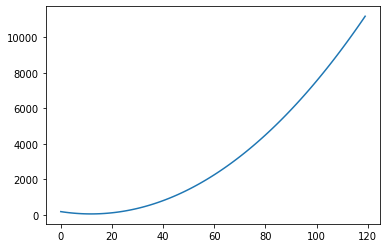

In [44]:
import numpy as np
z = np.polyfit(range(len(dates["cleaned_tweet"])), dates['cleaned_tweet'], 3)
p = np.poly1d(z)
x = range(len(dates["cleaned_tweet"]))
plt.plot(x, p(x))

# Plot

In [30]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(dates.index, 'cleaned_tweet', data=dates)

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_half_year)
plt.title('Tweet Frequency over time: 1 Feb - 31 May')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
# save graph
plt.savefig(DATA_OUT)
plt.close()

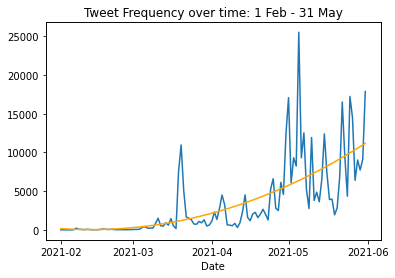

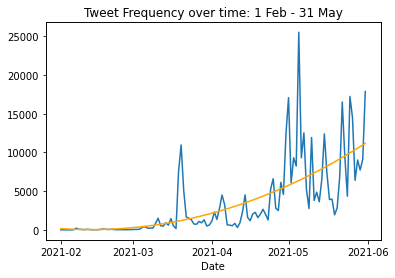

In [61]:
# testing trendline
import matplotlib.dates as mdates
import matplotlib.ticker as ticker


fig, ax = plt.subplots()
ax.plot(dates.index, 'cleaned_tweet', data=dates)

ax2 = ax.twiny()
z = np.polyfit(range(len(dates["cleaned_tweet"])), dates['cleaned_tweet'], 3)
p = np.poly1d(z)
x = range(len(dates["cleaned_tweet"]))
plt.plot(x, p(x), color='orange')

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=1)
ax.xaxis.set_major_locator(fmt_half_year)
ax2.xaxis.set_major_locator(ticker.NullLocator())
plt.title('Tweet Frequency over time: 1 Feb - 31 May')
ax.set_xlabel('Date')
plt.ylabel('Number of Tweets')

fig


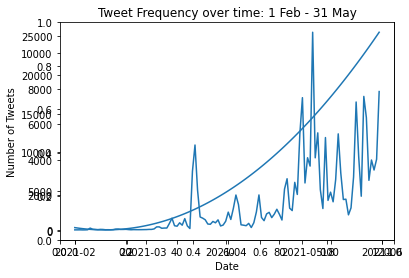

In [46]:
fig

In [ ]:
fig, ax = plt.subplots()

# Twin the x-axis twice to make independent y-axes.
axes = [ax, ax.twinx(), ax.twinx()]

# Make some space on the right side for the extra y-axis.
fig.subplots_adjust(right=0.75)

# Move the last y-axis spine over to the right by 20% of the width of the axes
axes[-1].spines['right'].set_position(('axes', 1.2))

# To make the border of the right-most axis visible, we need to turn the frame
# on. This hides the other plots, however, so we need to turn its fill off.
axes[-1].set_frame_on(True)
axes[-1].patch.set_visible(False)

# And finally we get to plot things...
colors = ('Green', 'Red', 'Blue')
for ax, color in zip(axes, colors):
    data = np.random.random(1) * np.random.random(10)
    ax.plot(data, marker='o', linestyle='none', color=color)
    ax.set_ylabel('%s Thing' % color, color=color)
    ax.tick_params(axis='y', colors=color)
axes[0].set_xlabel('X-axis')


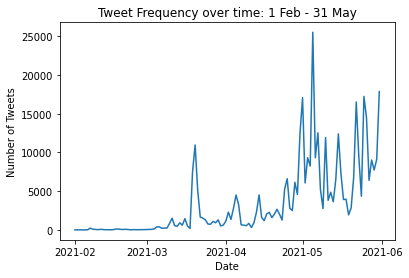

In [31]:
# display graph
fig